# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 1) Cargamos los datos

In [1]:
import numpy as np
import pandas as pd
import funpymodeling
import matplotlib.pyplot as plt

In [2]:
import mlflow.sklearn

In [3]:
# Creamos el experimento en MLFlow
mlflow.set_experiment(experiment_name="edvai_ds_mlops_bootcampi_trabajo_final")

2023/06/20 13:40:16 INFO mlflow.tracking.fluent: Experiment with name 'edvai_ds_mlops_bootcampi_trabajo_final' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/maferreyra/Documents/EDVAI_DS_MLOps_Bootcamp/Trabajo_Final/Parte_A/mlruns/244941314405736838', creation_time=1687279216968, experiment_id='244941314405736838', last_update_time=1687279216968, lifecycle_stage='active', name='edvai_ds_mlops_bootcampi_trabajo_final', tags={}>

In [4]:
# Para visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [5]:
df_data = pd.read_csv('../data/ohe_customer_dataset.csv', sep=',')

In [6]:
print(df_data.shape)
print(df_data.columns)
display(df_data.head(5))

(623, 52)
Index(['fraudulent', 'transactionFailed', 'paymentMethodRegistrationFailure',
       'orderAmount_(9.999, 18.0]', 'orderAmount_(18.0, 30.0]',
       'orderAmount_(30.0, 38.0]', 'orderAmount_(38.0, 47.0]',
       'orderAmount_(47.0, 353.0]', 'orderState_failed',
       'orderState_fulfilled', 'orderState_pending',
       'paymentMethodType_apple pay', 'paymentMethodType_bitcoin',
       'paymentMethodType_card', 'paymentMethodType_paypal',
       'paymentMethodProvider_American Express',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Maestro',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 13 digit',
       'paymentMethodProvider_VISA 16 digit', 'paymentMethodProvider_Voyager',
       'paymentMethodIssuer_Bastion Banks',
       'paymentMethodIssuer_Bulwark Trust Corp.',
       'paymentMeth

,fraudulent,transactionFailed,paymentMethodRegistrationFailure,"orderAmount_(9.999, 18.0]","orderAmount_(18.0, 30.0]","orderAmount_(30.0, 38.0]","orderAmount_(38.0, 47.0]","orderAmount_(47.0, 353.0]",orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodIssuer_Bastion Banks,paymentMethodIssuer_Bulwark Trust Corp.,paymentMethodIssuer_Citizens First Banks,paymentMethodIssuer_Fountain Financial Inc.,paymentMethodIssuer_Grand Credit Corporation,paymentMethodIssuer_Her Majesty Trust,paymentMethodIssuer_His Majesty Bank Corp.,paymentMethodIssuer_Rose Bancshares,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_weird,emailDomain_biz,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0


In [7]:
# Guardamos el tamaño del dataset
mlflow.log_param("dataset_shape", df_data.shape)

(623, 52)

In [8]:
display(df_data.dtypes)

fraudulent                                           int64
transactionFailed                                    int64
paymentMethodRegistrationFailure                     int64
orderAmount_(9.999, 18.0]                            int64
orderAmount_(18.0, 30.0]                             int64
orderAmount_(30.0, 38.0]                             int64
orderAmount_(38.0, 47.0]                             int64
orderAmount_(47.0, 353.0]                            int64
orderState_failed                                    int64
orderState_fulfilled                                 int64
orderState_pending                                   int64
paymentMethodType_apple pay                          int64
paymentMethodType_bitcoin                            int64
paymentMethodType_card                               int64
paymentMethodType_paypal                             int64
paymentMethodProvider_American Express               int64
paymentMethodProvider_Diners Club / Carte Blanche    int

In [9]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.0,366,0.587480,2,int64
1,transactionFailed,0,0.0,455,0.730337,2,int64
2,paymentMethodRegistrationFailure,0,0.0,541,0.868379,2,int64
3,"orderAmount_(9.999, 18.0]",0,0.0,491,0.788122,2,int64
4,"orderAmount_(18.0, 30.0]",0,0.0,494,0.792937,2,int64
5,"orderAmount_(30.0, 38.0]",0,0.0,507,0.813804,2,int64
6,"orderAmount_(38.0, 47.0]",0,0.0,489,0.784912,2,int64
7,"orderAmount_(47.0, 353.0]",0,0.0,511,0.820225,2,int64
8,orderState_failed,0,0.0,560,0.898876,2,int64
9,orderState_fulfilled,0,0.0,107,0.171750,2,int64


In [10]:
df_data['fraudulent'].value_counts(dropna=False, normalize=False), df_data['fraudulent'].value_counts(dropna=False, normalize=True) * 100

(0    366
 1    257
 Name: fraudulent, dtype: int64,
 0    58.747994
 1    41.252006
 Name: fraudulent, dtype: float64)

In [11]:
funpymodeling.freq_tbl(df_data['fraudulent'].astype(str))

,fraudulent,frequency,percentage,cumulative_perc
0,0,366,0.58748,0.58748
1,1,257,0.41252,1.00000


# 2) Modelo de Clasificacion

## 2.1) Separación de X de Y para entrenamiento

In [12]:
X = df_data.drop('fraudulent', axis=1)
y = df_data['fraudulent']

In [13]:
# Guardamos las columnas

import pickle

with open('../data/categories_ohe_without_fraudulent.pkl', 'wb') as handle:
    pickle.dump(X.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
TEST_SIZE = 0.3

In [16]:
# Guardamos el porcentaje del conjunto de entrenamiento
mlflow.log_param("percentage_dataset_test", TEST_SIZE)

0.3

In [17]:
# Spliteamos el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE,
)

## 2.2) Creamos y entrenamiento del modelo

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
N_ESTIMATORS = 500
RANDOM_STATE = 99

In [20]:
# Guardamos el numero de estimadores del modelo
mlflow.log_param("model_n_estimator", N_ESTIMATORS)

500

In [21]:
# Guardamos el random state del modelo
mlflow.log_param("model_random_state", RANDOM_STATE)

99

In [22]:
rf_model = RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE)

In [23]:
%%time

rf_model.fit(X_train, y_train)

CPU times: user 387 ms, sys: 10.7 ms, total: 398 ms
Wall time: 396 ms


RandomForestClassifier(n_estimators=500, random_state=99)

## 2.3) Calculamos algunas metricas del modelo entrenado

In [24]:
# En training (por defecto asume 0.5 como punto de corte)
pred_tr = rf_model.predict(X_train)

In [25]:
# En testing (por defecto asume 0.5 como punto de corte)
pred_ts = rf_model.predict(X_test)

In [26]:
from pprint import pprint

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
train_metrics = {
    'accuracy': accuracy_score(y_train, pred_tr, normalize=True),
    'precision': precision_score(y_train, pred_tr),
    'recall': recall_score(y_train, pred_tr),
    'f1_score': f1_score(y_train, pred_tr),
}

pprint(train_metrics)

{'accuracy': 1.0, 'f1_score': 1.0, 'precision': 1.0, 'recall': 1.0}


In [28]:
# Guardamos las metricas sobre el conjunto de entrenamiento
mlflow.log_metric("train_metrics.accuracy", train_metrics['accuracy'])
mlflow.log_metric("train_metrics.precision", train_metrics['precision'])
mlflow.log_metric("train_metrics.recall", train_metrics['recall'])
mlflow.log_metric("train_metrics.f1_score", train_metrics['f1_score'])

In [29]:
test_metrics = {
    'accuracy': accuracy_score(y_test, pred_ts, normalize=True),
    'precision': precision_score(y_test, pred_ts),
    'recall': recall_score(y_test, pred_ts),
    'f1_score': f1_score(y_test, pred_ts),
}

pprint(test_metrics)

{'accuracy': 0.8556149732620321,
 'f1_score': 0.8111888111888113,
 'precision': 0.8405797101449275,
 'recall': 0.7837837837837838}


In [30]:
# Guardamos las metricas sobre el conjunto de test
mlflow.log_metric("test_metrics.accuracy", test_metrics['accuracy'])
mlflow.log_metric("test_metrics.precision", test_metrics['precision'])
mlflow.log_metric("test_metrics.recall", test_metrics['recall'])
mlflow.log_metric("test_metrics.f1_score", test_metrics['f1_score'])

In [31]:
import seaborn as sns

<Axes: xlabel='Pred', ylabel='Actual'>

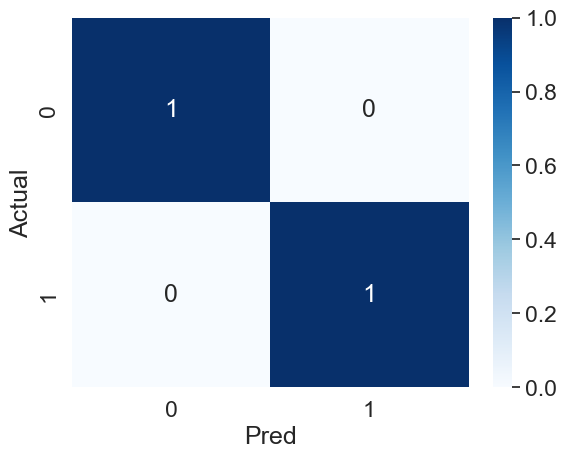

In [32]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat5 = pd.crosstab(
    index=y_train,    # filas    = valor real
    columns=pred_tr,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat5, annot=True, cmap='Blues', fmt='g')

<Axes: xlabel='Pred', ylabel='Actual'>

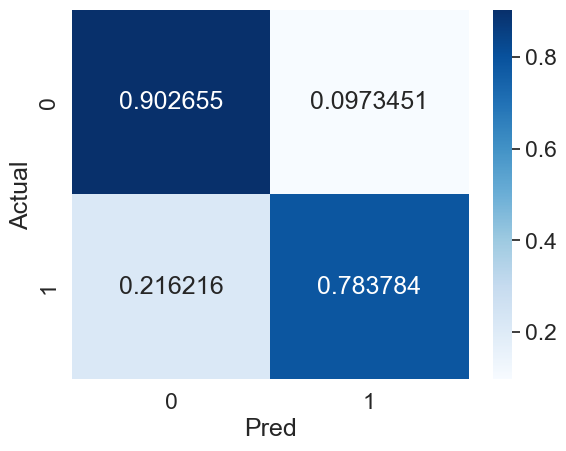

In [33]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat6 = pd.crosstab(
    index=y_test,     # filas    = valor real
    columns=pred_ts,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat6, annot=True, cmap='Blues', fmt='g')

## 2.4) Busquemos el mejor threshold para el modelo

In [34]:
from yellowbrick.classifier import DiscriminationThreshold

/Users/maferreyra/.pyenv/versions/3.9.16/envs/edvai/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


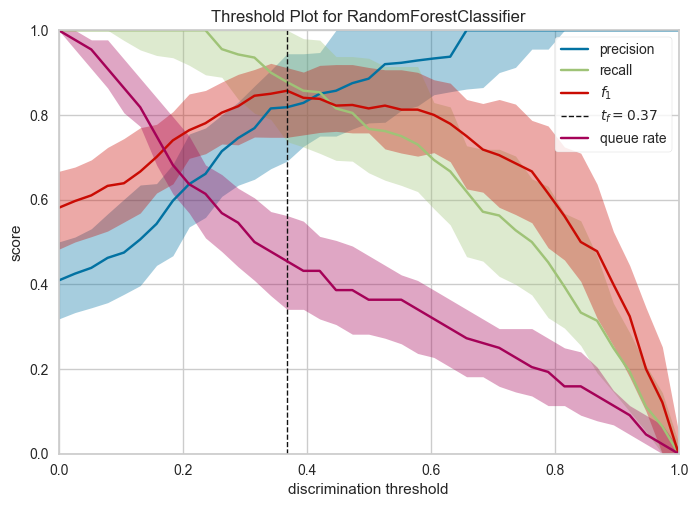

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [35]:
visualizer = DiscriminationThreshold(rf_model)

visualizer.fit(X_train, y_train) # Ajustar data al visualizador
visualizer.show()                # Mostrar figura

Seteamos el nuevo punto de corte en 0.37

In [36]:
# Guardamos el threshold calculado
mlflow.log_param("model_best_threshold", 0.37)

0.37

In [37]:
# En training
pred_prob_tr = rf_model.predict_proba(X_train)

In [38]:
pred_prob_tr = pred_prob_tr[:,1]

In [39]:
# En testing
pred_prob_ts = rf_model.predict_proba(X_test)

In [40]:
pred_prob_ts = pred_prob_ts[:,1]

In [41]:
pred_tr_2 = np.where(pred_prob_tr >= 0.37, 1, 0)

In [42]:
pred_ts_2 = np.where(pred_prob_ts >= 0.37, 1, 0)

In [43]:
train_metrics_2 = {
    'accuracy': accuracy_score(y_train, pred_tr_2, normalize=True),
    'precision': precision_score(y_train, pred_tr_2),
    'recall': recall_score(y_train, pred_tr_2),
    'f1_score': f1_score(y_train, pred_tr_2),
}

pprint(train_metrics_2)

{'accuracy': 1.0, 'f1_score': 1.0, 'precision': 1.0, 'recall': 1.0}


In [44]:
# Guardamos las metricas sobre el conjunto de entrenamiento
mlflow.log_metric("train_metrics_with_threshold.accuracy", train_metrics_2['accuracy'])
mlflow.log_metric("train_metrics_with_threshold.precision", train_metrics_2['precision'])
mlflow.log_metric("train_metrics_with_threshold.recall", train_metrics_2['recall'])
mlflow.log_metric("train_metrics_with_threshold.f1_score", train_metrics_2['f1_score'])

In [45]:
test_metrics_2 = {
    'accuracy': accuracy_score(y_test, pred_ts_2, normalize=True),
    'precision': precision_score(y_test, pred_ts_2),
    'recall': recall_score(y_test, pred_ts_2),
    'f1_score': f1_score(y_test, pred_ts_2),
}

pprint(test_metrics_2)

{'accuracy': 0.8502673796791443,
 'f1_score': 0.825,
 'precision': 0.7674418604651163,
 'recall': 0.8918918918918919}


In [46]:
# Guardamos las metricas sobre el conjunto de test
mlflow.log_metric("test_metrics_with_threshold.accuracy", test_metrics_2['accuracy'])
mlflow.log_metric("test_metrics_with_threshold.precision", test_metrics_2['precision'])
mlflow.log_metric("test_metrics_with_threshold.recall", test_metrics_2['recall'])
mlflow.log_metric("test_metrics_with_threshold.f1_score", test_metrics_2['f1_score'])

<Axes: xlabel='Pred', ylabel='Actual'>

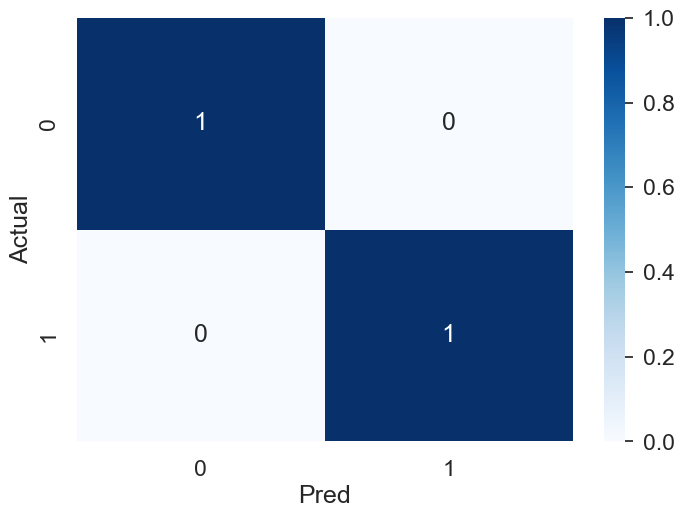

In [47]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat5 = pd.crosstab(
    index=y_train,      # filas    = valor real
    columns=pred_tr_2,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat5, annot=True, cmap='Blues', fmt='g')

<Axes: xlabel='Pred', ylabel='Actual'>

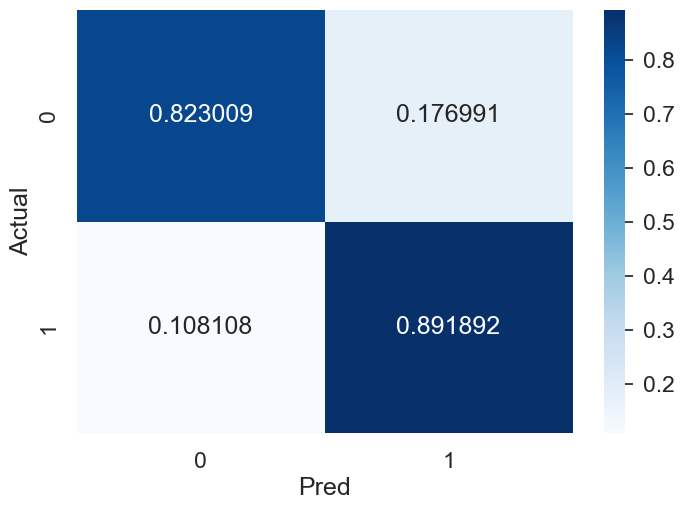

In [48]:
sns.set(font_scale=1.5)  # Ajuste tamaño de letra (var global)

conf_mat6 = pd.crosstab(
    index=y_test,       # filas    = valor real
    columns=pred_ts_2,  # columnas = valor predicho
    rownames=['Actual'], 
    colnames=['Pred'], 
    normalize='index'
)

sns.heatmap(conf_mat6, annot=True, cmap='Blues', fmt='g')

# 3) Guardamos el modelo entrenado

In [49]:
# Guardar en el disco
filename = '../data/modelo_proyecto_final.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [50]:
# Guardar en el disco
filename = 'modelo_proyecto_final.pkl'
mlflow.sklearn.log_model(rf_model, filename)

/Users/maferreyra/.pyenv/versions/3.9.16/envs/edvai/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


---
---

In [51]:
pd.DataFrame([X_train.iloc[0].to_dict()])

,transactionFailed,paymentMethodRegistrationFailure,"orderAmount_(9.999, 18.0]","orderAmount_(18.0, 30.0]","orderAmount_(30.0, 38.0]","orderAmount_(38.0, 47.0]","orderAmount_(47.0, 353.0]",orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodIssuer_Bastion Banks,paymentMethodIssuer_Bulwark Trust Corp.,paymentMethodIssuer_Citizens First Banks,paymentMethodIssuer_Fountain Financial Inc.,paymentMethodIssuer_Grand Credit Corporation,paymentMethodIssuer_Her Majesty Trust,paymentMethodIssuer_His Majesty Bank Corp.,paymentMethodIssuer_Rose Bancshares,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_weird,emailDomain_biz,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [52]:
rf_model.predict_proba(pd.DataFrame([X_train.iloc[0].to_dict()]))

array([[0.936, 0.064]])

In [53]:
y_train.iloc[0]

0